# Loading Libraries

In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import imageio

In [2]:
from matplotlib import pyplot as plt

In [3]:
from skimage.filters import threshold_otsu

In [4]:
import seaborn as sns
sns.set_style("darkgrid")

# Utility Functions

In [5]:
def loadData(path):
    """ X = Images and Y = masks """

    train_x = sorted(glob(os.path.join(path, "training", "images", "*.tif")))
    mask_x =  sorted(glob(os.path.join(path, "training", "mask", "*.tif")))
    train_y = sorted(glob(os.path.join(path, "training", "1st_manual", "*.gif")))
    return (train_x, mask_x,train_y)

In [6]:
def createDir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [7]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) * (i / 255.0)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [8]:
# def squareRescale(image, power = 1.0):
#     table = np.array([[i//(256**power) for i in row] for row in image]).astype("uint16")
#     return table

# Loading The Data Set

In [9]:
""" Seeding """
np.random.seed(42)

""" Load the data """
data_path = "D:\\Data sets\\DRIVE"
(train_x, mask_x, train_y) = loadData(data_path)

print(f"Train: {len(train_x)} - {len(train_y)} - {len(mask_x)}")


Train: 20 - 20 - 20


# The Image

In [10]:
x = train_x[0]
y = train_y[0]
m = mask_x[0]
""" Reading image and mask """
src = cv2.imread(x, cv2.IMREAD_COLOR)
x = src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

m  = mask  = cv2.imread(m, cv2.IMREAD_COLOR)
y = imageio.mimread(y)[0]




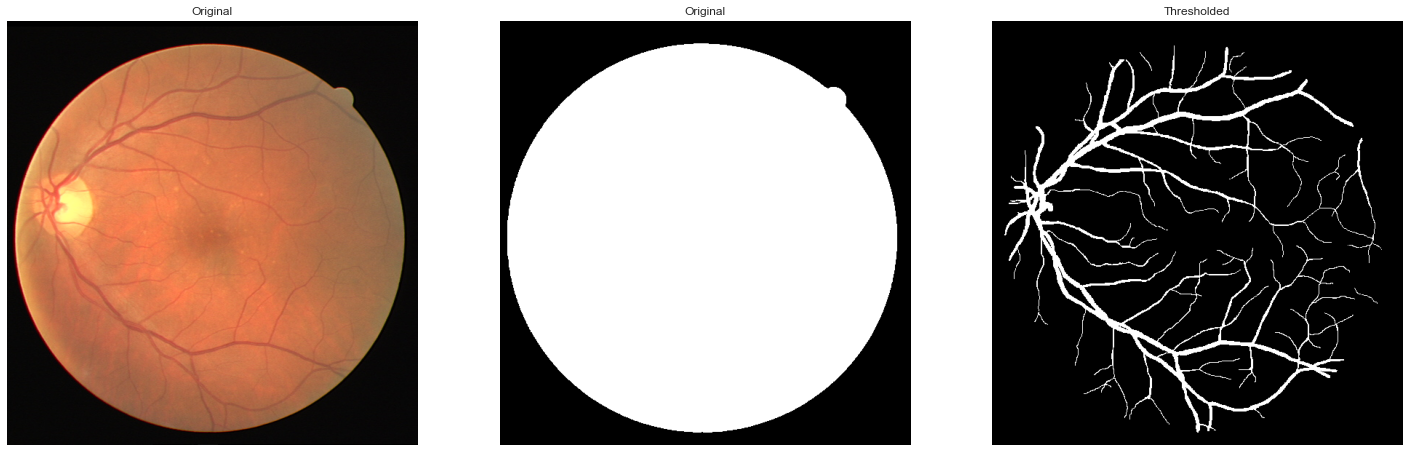

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 25))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(x)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(m)
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(y, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')
plt.show()

<AxesSubplot:ylabel='Count'>

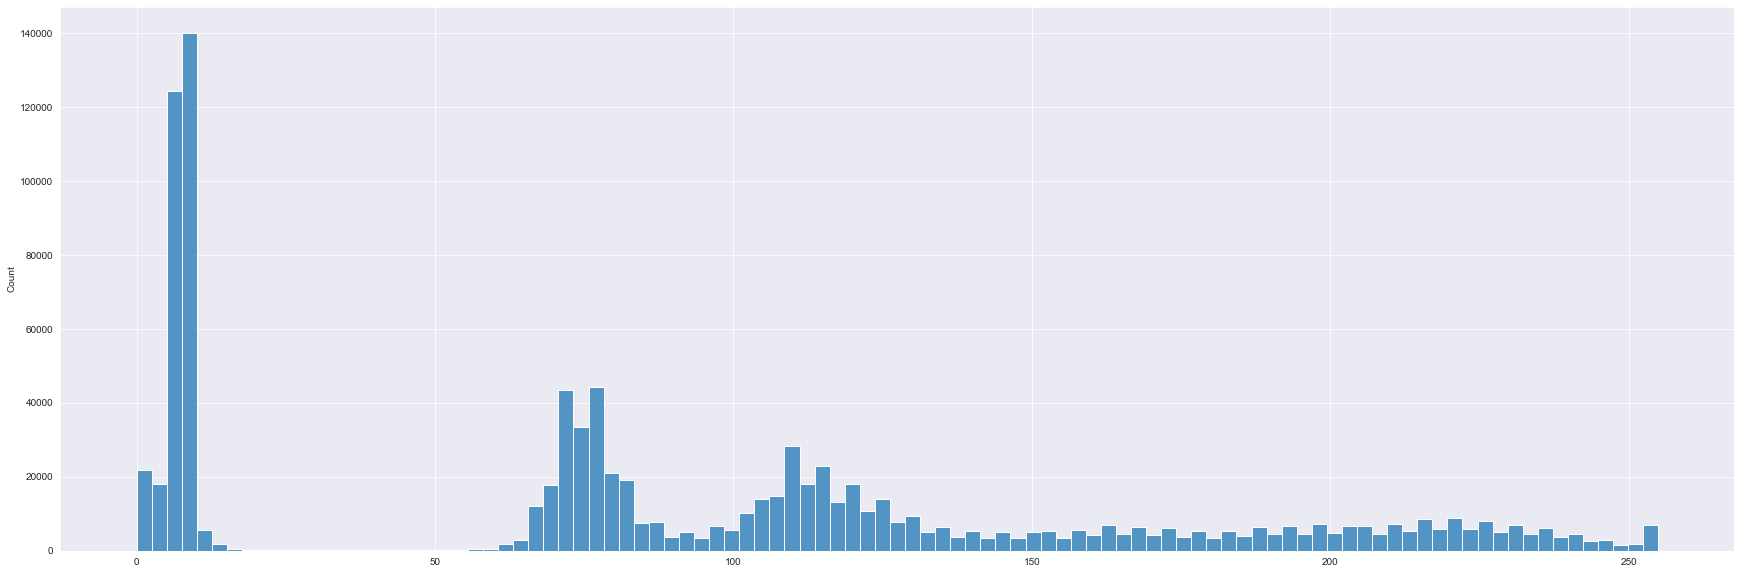

In [12]:
plt.figure(figsize=(30,10))
sns.histplot(data= x.ravel())

In [13]:
m.shape

(584, 565, 3)

In [14]:
bins_num = 256

hist_x, bin_edges = np.histogram(x, bins=bins_num)

In [15]:
hist_x = hist_x.ravel()
hist_x

array([19814,  1363,   630,  1005,  3308, 13654, 40302, 84019, 85708,
       41616, 12740,  3830,  1683,   873,   520,   351,   214,   167,
         127,   103,   108,   119,   114,   112,    97,    87,    85,
          98,    88,    85,    91,    94,    85,    97,    87,    93,
          93,    77,    74,    84,    90,   104,    70,    86,    84,
          83,    65,   103,    76,    79,    83,    82,    77,   103,
          92,   104,   106,   159,   192,   264,   333,   413,   597,
         832,  1219,  1793,  2646,  3868,  5524,  7760, 10132, 12471,
       14726, 16195, 16706, 16859, 16005, 14882, 13377, 11560,  9380,
        7807,  6240,  5101,  4143,  3461,  2956,  2542,  2269,  1984,
        1788,  1683,  1609,  1697,  1673,  1832,  1959,  2151,  2536,
        2797,  2913,  3155,  3296,  3693,  3857,  4504,  5525,  6716,
        8115,  8999,  9796,  9658,  9382,  8738,  8054,  7646,  7230,
        6709,  6516,  6336,  6060,  5695,  5556,  5236,  5055,  4669,
        4409,  4175,

# The Segmentation

In [16]:
from skimage.color import rgb2hsv

In [17]:
gamma_x = adjust_gamma(src,0.8)

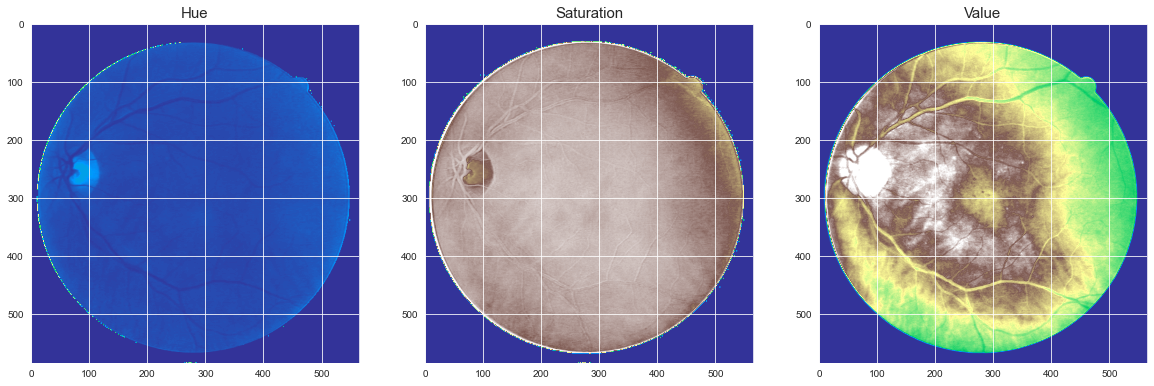

In [21]:

#convert to hsv scalga
hsv_gx = rgb2hsv(gamma_x)
#graph per HSV Channel
fig, ax = plt.subplots(1, 3, figsize=(20,20))
ax[0].imshow(hsv_gx[:,:,0], cmap='terrain')
ax[0].set_title('Hue',fontsize=15)
ax[1].imshow(hsv_gx[:,:,1], cmap='terrain')
ax[1].set_title('Saturation',fontsize=15)
ax[2].imshow(hsv_gx[:,:,2], cmap='terrain')
ax[2].set_title('Value',fontsize=15);
plt.show()

In [24]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(2)

In [52]:
flatten_v =  hsv_gx[:,:,2].reshape(584*565,1)

In [53]:
kmeans.fit(flatten_v)

KMeans(n_clusters=2)

In [54]:
identified_clusters = kmeans.fit_predict(flatten_v)

In [55]:
identified_clusters.shape

(329960,)

In [56]:
clustered_v = identified_clusters.reshape(584,565)

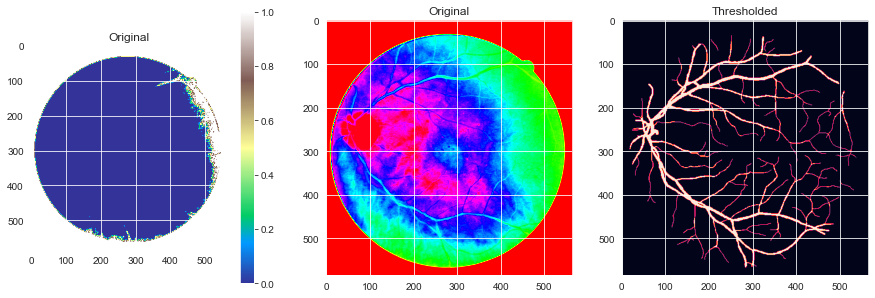

In [61]:
hsv_m = rgb2hsv(m)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

im = ax[0].imshow(clustered_v, cmap="terrain")
ax[0].set_title('Original')
fig.colorbar(im,ax=ax[0])

ax[1].imshow(hsv_gx[:,:,2], cmap="hsv")
ax[1].set_title('Original')

ax[2].imshow(y)
ax[2].set_title('Thresholded')
plt.show()

In [58]:
kmeans.inertia_

7545.168552663058

In [59]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(flatten_v)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

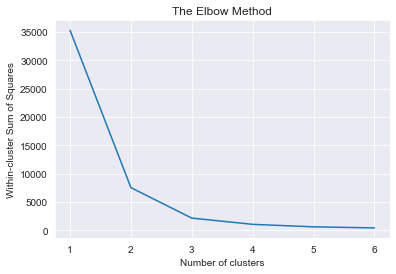

In [60]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

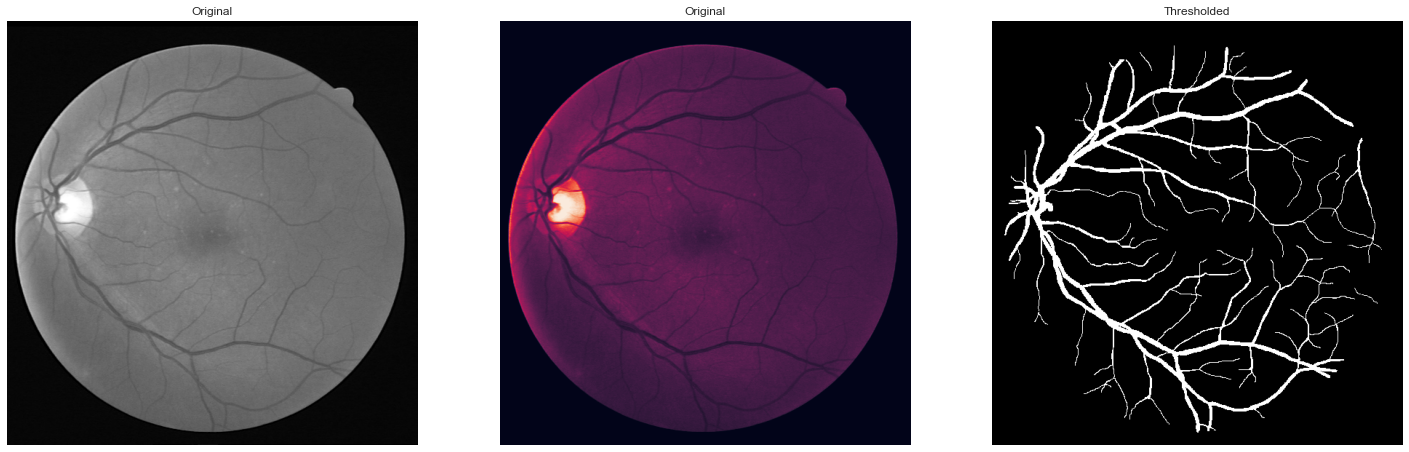

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 25))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(x, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(h)
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(y, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')
plt.show()

In [18]:
h = adjustPower(x, power=2)

In [19]:
h

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [81, 64, 49, ..., 49, 49, 49],
       [49, 49, 49, ..., 49, 49, 36],
       [49, 36, 36, ...,  0,  1,  1]], dtype=uint16)

In [24]:
h.max()

65025

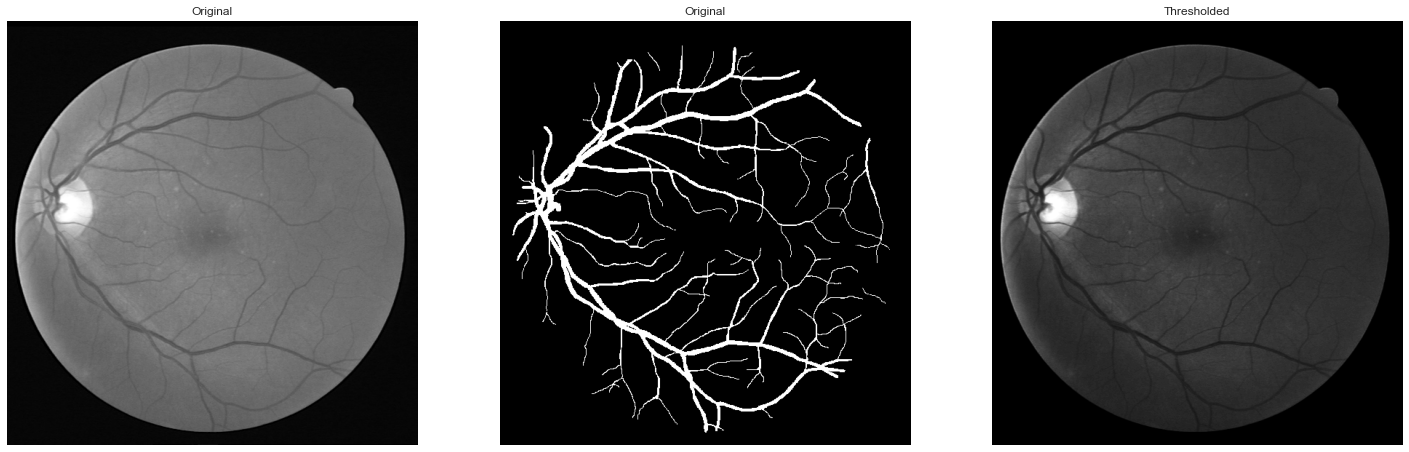

In [85]:
binary = x > 100

fig, axes = plt.subplots(ncols=3, figsize=(25, 25))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(x, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(y, cmap=plt.cm.gray)
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(h, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')
plt.show()


In [97]:
h

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [81, 64, 49, ..., 49, 49, 49],
       [49, 49, 49, ..., 49, 49, 36],
       [49, 36, 36, ...,  0,  1,  1]], dtype=uint16)

In [86]:
image = h#cv2.GaussianBlur(h, (5, 5), 0)

In [87]:
h.min(),h.max()

(0, 65025)

In [88]:
# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(h, bins=bins_num)
histM, bin_edges = np.histogram(m, bins=bins_num)
# Get normalized histogram if it is required



In [89]:
#hist = np.divide(hist.ravel(), hist.max())
hist = hist.ravel()
histM = histM.ravel()

In [90]:
hist, histM

(array([104450,    193,     99,     96,     90,     84,     59,     54,
            38,     49,     32,     68,     28,     53,     33,     40,
            39,     41,     47,     51,     33,     20,     36,     50,
            50,    128,     91,    228,    212,    547,    375,    923,
           610,    666,   1754,   1176,   1422,   3815,   2430,   2606,
          5981,   3480,   3665,   4330,   5349,  14510,   8853,   9643,
          9517,   9230,   8609,   7958,  14641,   6586,   6408,   6258,
          5969,   5598,   5468,   5137,   4940,   4550,   4281,   4032,
          3516,   3239,   2984,   2739,   2476,   2196,   2046,   1880,
          1598,   1383,   1250,      0,   1162,    968,    834,    797,
           717,    665,    590,    589,      0,    501,    518,    413,
           401,    371,    363,      0,    351,    334,    295,    285,
             0,    267,    233,    219,    218,      0,    201,    200,
           189,    176,      0,    158,    138,    115,      0, 

In [63]:
hist[0], histM[0]

(104450, 104360)

In [191]:
# hist[0] = 0
# hist[1] = 0#max(hist[1] - histM[1], 0)
# hist[2] = 0#max(hist[2] - histM[2], 0)
# hist[3] = 0#max(hist[3] - histM[3], 0)
# hist[4] = 0#max(hist[4] - histM[4], 0)

In [93]:
hist.max(), hist.argmax()

(104450, 0)

In [69]:
#hist = np.divide(hist.ravel(), hist.max())

In [94]:

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  28.388671875


# Graphical Reprisentation

<AxesSubplot:ylabel='Count'>

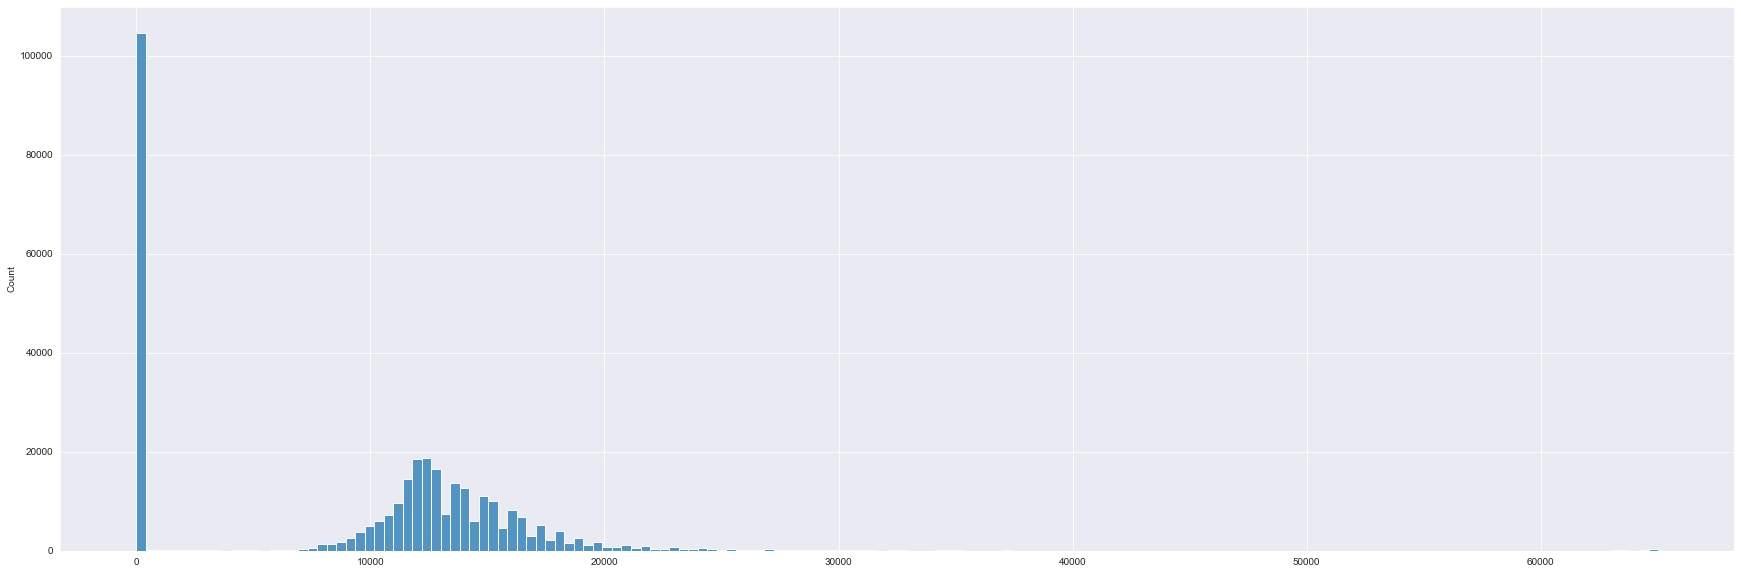

In [95]:
plt.figure(figsize=(30,10))
sns.histplot(data= h.ravel())

[(0.0, 30000.0)]

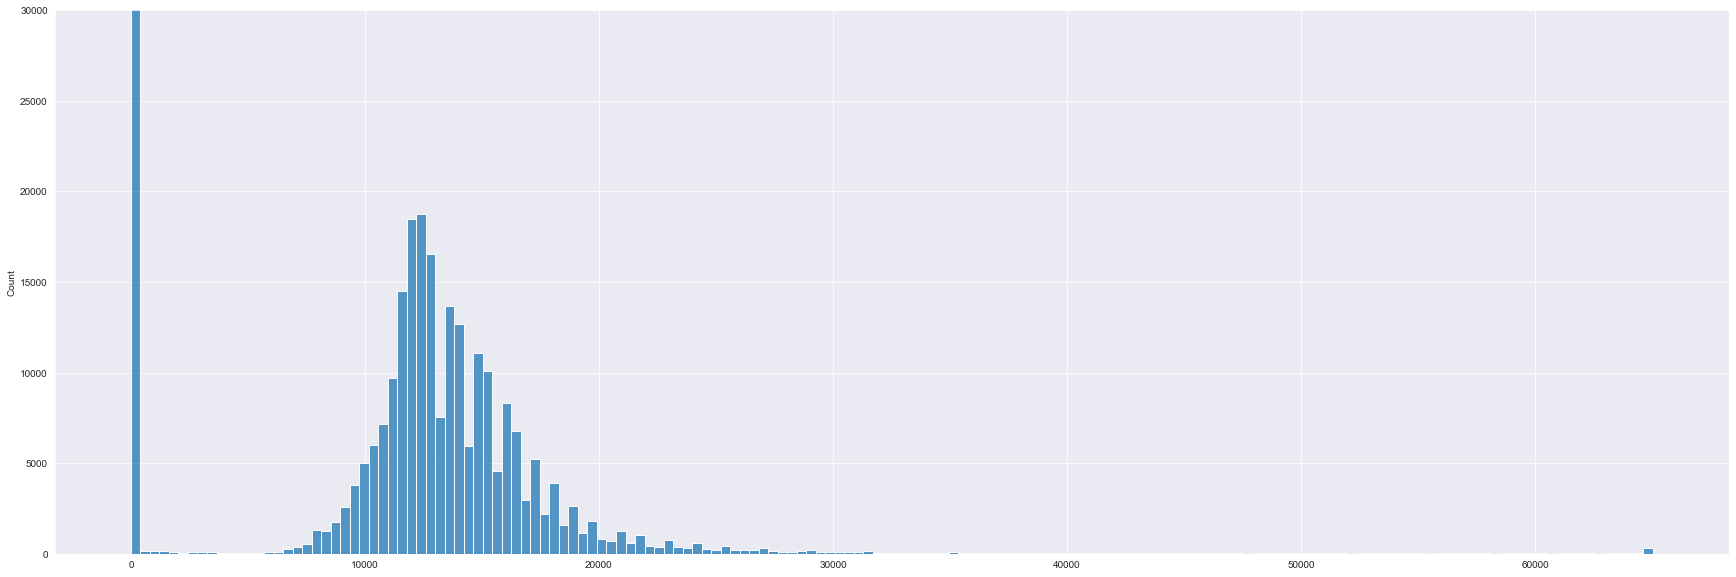

In [96]:
plt.figure(figsize=(30,10))
fig = sns.histplot(data= h.ravel())
fig.set(ylim=(0, 30000))
#fig.set(xlim=(0, 60000))
#fig.axvline(threshold, ls='--', c='red')